In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix, f1_score, recall_score, precision_score, classification_report
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist  # Import Fashion MNIST dataset

In [31]:
# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((-1, 28, 28, 1)) / 255.0  # Reshape and normalize training images
x_test = x_test.reshape((-1, 28, 28, 1)) / 255.0    # Reshape and normalize test images
y_train = to_categorical(y_train, num_classes=10)  # Convert training labels to one-hot encoded vectors
y_test = to_categorical(y_test, num_classes=10)    # Convert test labels to one-hot encoded vectors

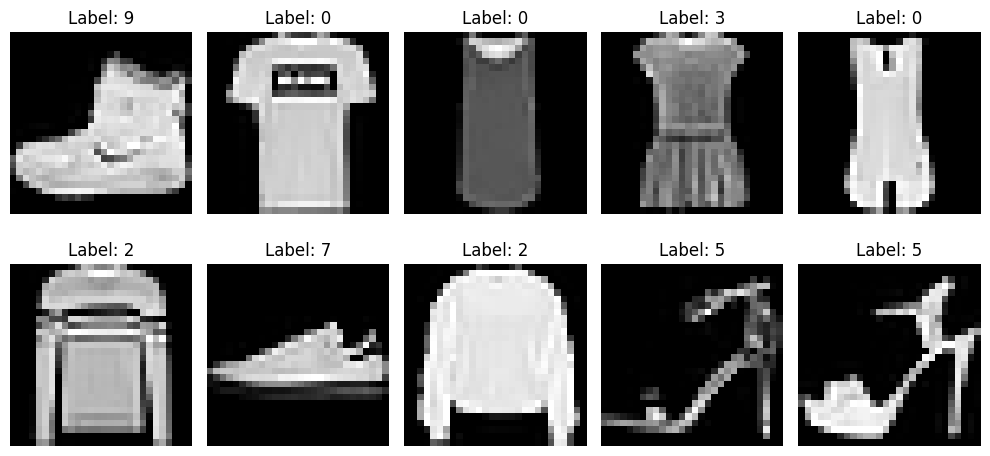

In [32]:
# Visualize sample images from the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()
for i in range(10):
    axes[i].imshow(x_train[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"Label: {np.argmax(y_train[i])}")
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [33]:

# Build a simplified VGG16 model
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten layer to transition from convolutional to dense layers
model.add(Flatten())

# Dense layers
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 classes for Fashion MNIST

In [34]:
model.summary()  # Print the architecture of the model

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                 

In [35]:
# Print trainable parameters of the model
for layer in model.layers:
    print(f"Layer {layer.name} : {layer.count_params()} trainable parameters")
    print('----------------------------------------------')

Layer conv2d_16 : 640 trainable parameters
----------------------------------------------
Layer conv2d_17 : 36928 trainable parameters
----------------------------------------------
Layer max_pooling2d_8 : 0 trainable parameters
----------------------------------------------
Layer conv2d_18 : 73856 trainable parameters
----------------------------------------------
Layer conv2d_19 : 147584 trainable parameters
----------------------------------------------
Layer max_pooling2d_9 : 0 trainable parameters
----------------------------------------------
Layer flatten_4 : 0 trainable parameters
----------------------------------------------
Layer dense_8 : 40980 trainable parameters
----------------------------------------------
Layer dense_9 : 210 trainable parameters
----------------------------------------------


In [36]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
# Train the model
model.fit(x_train, y_train, batch_size=600, epochs=10, validation_data=(x_test, y_test))  # Increase the number of epochs

Epoch 1/10
100/100 [==============================] - 7s 47ms/step - loss: 0.8283 - accuracy: 0.7019 - val_loss: 0.5079 - val_accuracy: 0.8062
Epoch 2/10
100/100 [==============================] - 4s 44ms/step - loss: 0.4350 - accuracy: 0.8406 - val_loss: 0.4181 - val_accuracy: 0.8496
Epoch 3/10
100/100 [==============================] - 5s 45ms/step - loss: 0.3637 - accuracy: 0.8683 - val_loss: 0.3443 - val_accuracy: 0.8777
Epoch 4/10
100/100 [==============================] - 5s 46ms/step - loss: 0.3170 - accuracy: 0.8853 - val_loss: 0.3231 - val_accuracy: 0.8851
Epoch 5/10
100/100 [==============================] - 4s 44ms/step - loss: 0.2844 - accuracy: 0.8974 - val_loss: 0.3115 - val_accuracy: 0.8872
Epoch 6/10
100/100 [==============================] - 5s 45ms/step - loss: 0.2646 - accuracy: 0.9039 - val_loss: 0.2919 - val_accuracy: 0.8974
Epoch 7/10
100/100 [==============================] - 5s 45ms/step - loss: 0.2391 - accuracy: 0.9131 - val_loss: 0.2787 - val_accuracy: 0.9014

In [38]:
# Predictions on the test set
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [39]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2534 - accuracy: 0.9132
Test Loss: 0.2534
Test Accuracy: 0.9132


In [40]:
# Convert from One Hot Encoding to int values that represent int labels
num_of_classes = y_test.shape[1]
print('Number of classes: ', num_of_classes)
true_labels = np.argmax(y_test, axis=1)
print(true_labels[:30])

pred_labels = np.argmax(y_pred, axis=1)
print(pred_labels[:30])

Number of classes:  10
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]
[9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 4 8 0 2 5 7 5 1 6 6 0 9 4]


In [41]:
# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, pred_labels, average='macro')
recall = recall_score(true_labels, pred_labels, average='macro')
f1 = f1_score(true_labels, pred_labels, average='macro')

print('Precision Score:', precision)
print('Recall Score:', recall)
print('F1 Score:', f1)

Precision Score: 0.9150450746971274
Recall Score: 0.9132
F1 Score: 0.9137396405231911


Confusion Matrix:
[[857   0  26  12   2   1  94   0   8   0]
 [  2 980   1  11   2   0   2   0   2   0]
 [  8   0 899   4  36   0  53   0   0   0]
 [ 12   1  29 869  48   0  40   0   1   0]
 [  0   1  48   5 868   0  78   0   0   0]
 [  0   0   0   0   0 993   0   3   0   4]
 [ 99   1  52  12  55   0 780   0   1   0]
 [  0   0   0   0   0  24   0 938   0  38]
 [  1   1   7   4   5   1   4   0 975   2]
 [  0   0   0   0   0   7   0  20   0 973]]


<Axes: >

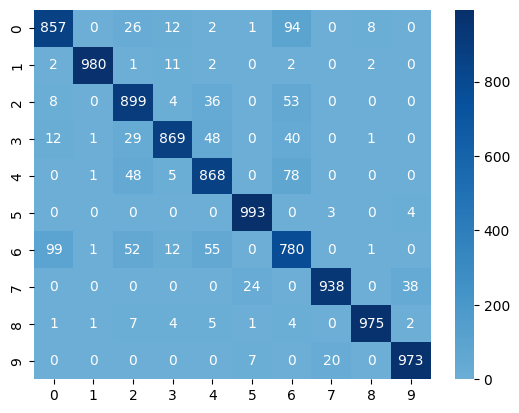

In [42]:
# Confusion Matrix
cm = confusion_matrix(true_labels, pred_labels)
print('Confusion Matrix:')
print(cm)

# Plot the Confusion Matrix
sns.heatmap(cm, center=True, annot=True, fmt="d", cmap="Blues")

In [43]:
# Classification Report
repo = classification_report(true_labels, pred_labels)
print('Classification Report:')
print(repo)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1000
           1       1.00      0.98      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.95      0.87      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.97      0.99      0.98      1000
           6       0.74      0.78      0.76      1000
           7       0.98      0.94      0.96      1000
           8       0.99      0.97      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.92      0.91      0.91     10000
weighted avg       0.92      0.91      0.91     10000

